### Objetivo do Projeto:
Este projeto tem como objetivo realizar uma análise exploratória/preditiva em um conjunto de dados sintéticos que registra mais de 6 milhões de transações financeiras móveis. O foco principal é a detecção de fraudes.

O conjunto de dados abrange cinco tipos de transações: CASH-IN, CASH-OUT, DEBIT, PAYMENT e TRANSFER. Algumas dessas transações já foram sinalizadas como fraudulentas por um algoritmo existente.

A análise buscará:

Identificar padrões e características que distinguem transações fraudulentas das legítimas.

Explorar novas features (engenharia de atributos) que possam fortalecer os modelos de detecção de fraudes.

Avaliar e descobrir possíveis pontos fracos ou áreas onde o algoritmo de detecção atual pode estar falhando.

O objetivo final é gerar insights que possam ser utilizados para desenvolver algoritmos de detecção de fraudes mais robustos e eficientes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

df = pd.read_csv('AIML Dataset.csv')

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Menos de 13% das transações dos clientes são fraudes

In [4]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

16 transações estão em estado de bandeira vermelha de alerta, ainda não comprovado se são de fato, mas entra como suspeita de transação em fraude.

In [5]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Não há valores nulos no dataset

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Há mais de 6 milhões de linhas e 11 colunas

In [7]:
df.shape

(6362620, 11)

In [8]:
round((df["isFraud"].value_counts()[1] / df.shape[0])*100, 2)

np.float64(0.13)

O gráfico mostra que as operações mais populares neste serviço de dinheiro móvel são retirar dinheiro (CASH_OUT) e fazer pagamentos (PAYMENT), seguidas por depósitos (CASH_IN). As transferências para outros usuários (TRANSFER) e, especialmente, as transferências para contas bancárias (DEBIT), são muito menos frequentes.

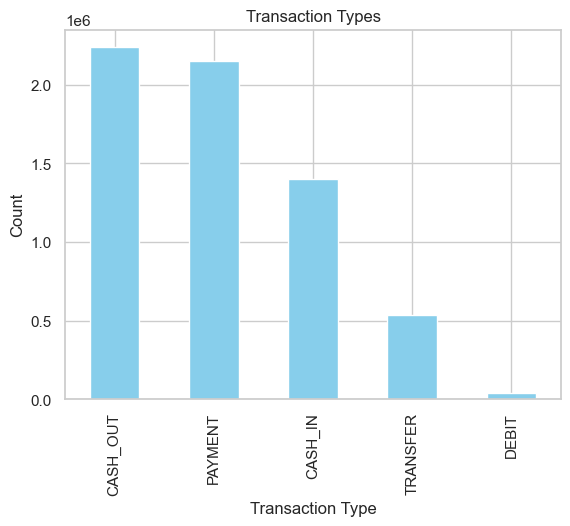

In [9]:
figure = plt.Figure(figsize=(14,7))
df["type"].value_counts().plot(kind='bar', title="Transaction Types", color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

O que o Gráfico Revela:

TRANSFER: De longe, é o tipo de transação com a maior taxa de fraude. Embora, como vimos no primeiro gráfico, as transferências não sejam o tipo de transação mais comum, quando uma acontece, ela tem a maior probabilidade de ser fraudulenta em comparação com os outros tipos. A taxa de fraude aqui é de aproximadamente 0.0078, ou 0.78%.

CASH_OUT: É o segundo tipo de transação com maior risco. A taxa de fraude é significativamente menor que a de TRANSFER, mas ainda é relevante (cerca de 0.19%).

CASH_IN, DEBIT, PAYMENT: Para esses três tipos de transação, a taxa de fraude é praticamente zero. Isso indica que são operações extremamente seguras neste conjunto de dados.

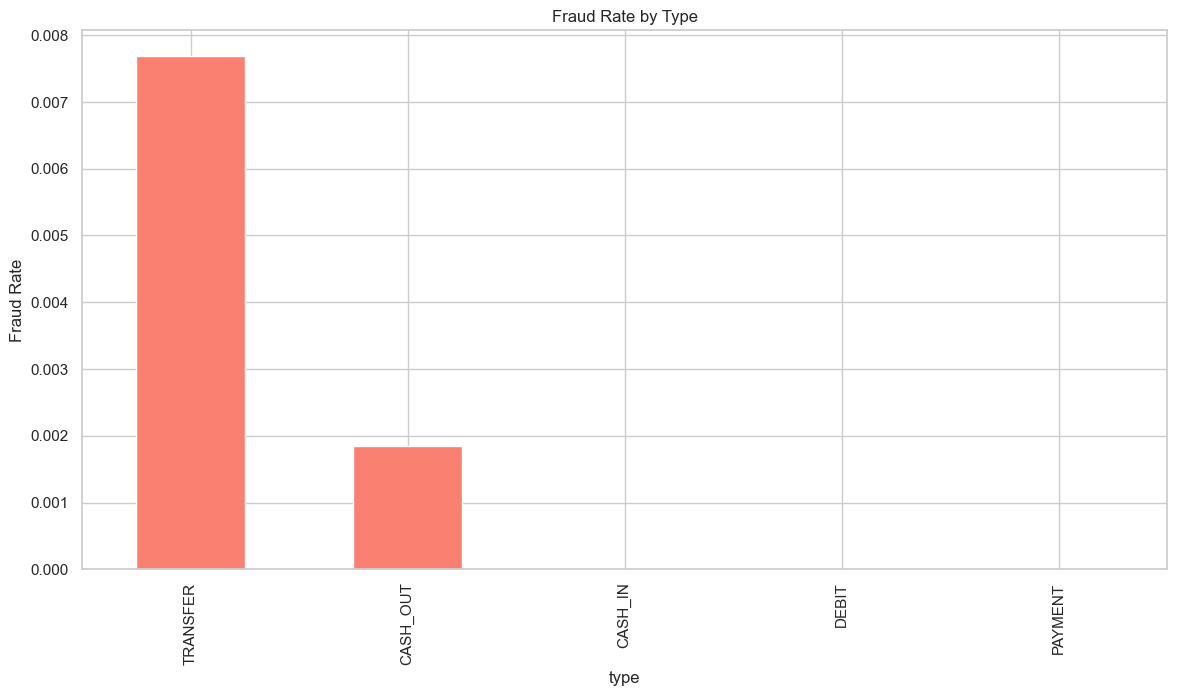

In [10]:
figure = plt.figure(figsize=(14, 7))
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

Grande Dispersão dos Dados: O desvio padrão (std) de R$ 603.858 é mais de três vezes maior que a média (mean) de R$ 179.861. Isso indica que os valores das transações são extremamente dispersos e não seguem uma distribuição normal.

Média Influenciada por Outliers: A média (mean) é mais que o dobro da mediana (o valor de 50%, que é R$ 74.871). Isso é um forte indício de que existem transações com valores muito altos (outliers) que estão "puxando" o valor médio para cima. A mediana representa melhor o valor de uma "transação típica" neste dataset.

Presença de Valores Extremos: As transações variam de R$ 0 até um máximo impressionante de R$ 92,4 milhões, confirmando a presença de valores extremos que se destacam da maioria das operações.

Conclusão: A distribuição dos valores é fortemente assimétrica à direita. A grande maioria das transações envolve valores mais baixos (75% delas são abaixo de R$ 208.721), enquanto uma pequena quantidade de transações possui valores excepcionalmente altos. Esses valores extremos são de grande interesse para a análise, pois podem ser um forte indicador de atividade fraudulenta.

In [11]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

O histograma revela que os dados de transação possuem uma distribuição bimodal, o que é um insight muito importante.

Isso significa que, em vez de ter um único "grupo" de transações, há  dois grupos principais e distintos:

Grupo 1 (Pico Menor): Um grande volume de transações agrupado em torno do valor log-transformado de 8.5. (Isso corresponde a valores reais próximos de R$ 4.900).

Grupo 2 (Pico Maior): Um volume ainda maior de transações agrupado em torno do valor log-transformado de 12.5. (Isso corresponde a valores reais próximos de R$ 268.000).

Conclusão da Análise: Os dados não são homogêneos. A transformação log1p permitiu "comprimir" a escala e enxergar esses dois comportamentos, que antes estavam escondidos. Para a análise de fraude, a hipótese mais provável é que um desses picos represente transações normais e o outro represente transações fraudulentas.

2. Resumo da Regra de Cálculo do np.log1p
O cálculo é y = ln(1 + x) e tem duas regras principais:

A Regra da Segurança (o "1p"):

O cálculo primeiro soma 1 ao seu valor original (x).

Propósito: Isso é para lidar com transações de valor zero. log(0) daria erro, mas log(1 + 0) vira log(1), que é 0. Isso permite que você mantenha os dados de R$ 0 na análise sem quebrar o código.

A Regra da Compressão (o "log"):

Depois, ele calcula o Logaritmo Natural (ln) do resultado (1 + x). O ln faz:"Quantas vezes eu preciso multiplicar o número euler($\approx 2.718$) por ele mesmo para chegar em 4915?"
Vamos provar. Isso é o mesmo que dizer:
$e^{8.5} = 4915$
(Lê-se: "o número $e$ elevado à potência 8.5 é igual a 4915")

Propósito: Isso "comprime" a escala. Valores muito grandes (como 1.000.000) são transformados em valores pequenos (como 13.8). Isso reduz a diferença drástica entre os números e permite que o gráfico mostre a verdadeira "forma" dos seus dados (revelando os dois picos).




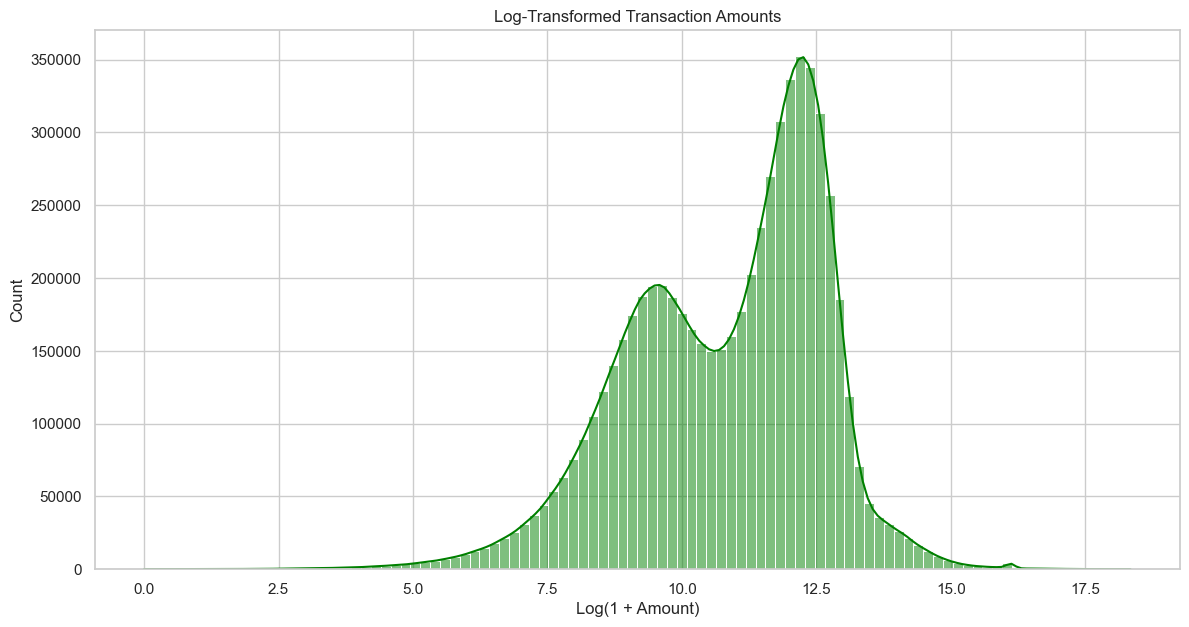

In [12]:
figure = plt.figure(figsize=(14, 7))
sns.histplot(np.log1p(df["amount"]), bins=100, kde = True, color='green')
plt.title("Log-Transformed Transaction Amounts")
plt.xlabel("Log(1 + Amount)")
plt.show()

Medianas bem diferentes:

isFraud = 0 (não fraude): a mediana é baixa (próxima de ~11k no gráfico descrito pelo notebook).
isFraud = 1 (fraude): a mediana é muito mais alta (por volta de ~22k).
Interpretação: transações fraudulentas tendem a ter valores significativamente maiores que transações legítimas (na faixa abaixo de 50k). O amount é um forte discriminador entre classes.
Caixas com tamanhos diferentes (dispersão):

Para isFraud = 0 a caixa é mais baixa/compacta, mostrando que a maioria das transações não fraudulentas está concentrada em valores baixos.
Para isFraud = 1 a caixa é maior e deslocada para cima, indicando que as fraudes têm maior variabilidade nos valores centrais (ex.: muitos valores entre 9k e 35k segundo a descrição).
Implicação: há maior variabilidade típica nas fraudes — modelos precisam capturar essa dispersão.
Bigodes e outliers:

isFraud = 0 mostra muitos outliers acima do bigode (pontos entre ~22k e 50k). Ou seja, existem poucas transações normais de alto valor que aparecem como outliers.
isFraud = 1 parece ter bigode superior chegando perto do limite de 50k e poucos outliers além disso — valores altos, dentro do subconjunto de fraudes, são "normais".
Interpretação: valores elevados são raros em legítimos (torna-os suspeitos), mas comuns entre fraudes — reforça que valor alto aumenta probabilidade de fraude.
Efeito do filtro (< 50k):

Você truncou/filtrou em 50k; portanto as diferenças aqui refletem só esse intervalo. Transações acima de 50k (que existem no dataset) foram removidas — isso evita que outliers extremos escondam a distribuição, mas também pode excluir fraudes muito grandes. Tenha isso em mente ao interpretar: a evidência é válida para a faixa < 50k.

Text(0.5, 1.0, 'Amount vs isFraud (Filtered under 50K)')

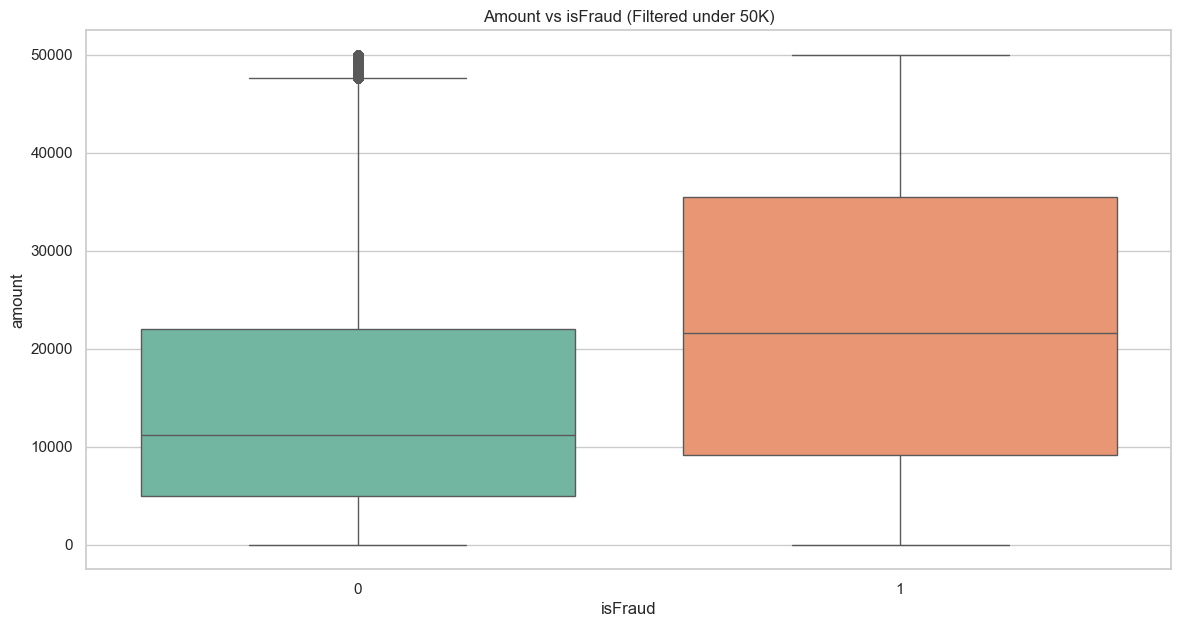

In [13]:
figure = plt.figure(figsize=(14, 7))
sns.boxplot(data=df[df["amount"] < 50000], x= "isFraud", y="amount", palette="Set2")
plt.title("Amount vs isFraud (Filtered under 50K)")

In [14]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

 o newbalanceOrig é maior que o oldbalanceOrg, isso é um indicador fortíssimo de FRAUDE 

In [15]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

A conta que deveria RECEBER dinheiro, na verdade, PERDEU dinheiro ou teve seu saldo diminuído após a transação, indicando fraude, ou seja: o saldo da conta de destino diminuiu após uma transação que deveria, logicamente, aumentá-lo.

In [16]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

Podemos perceber que as fraudes não dependem do tempo("step"), então por isso vamos remover a coluna step, pois, parece que não há uma tendência óbvia (o número de fraudes não aumenta nem diminui consistentemente ao longo do tempo) nem uma sazonalidade clara (um padrão que se repete em ciclos)

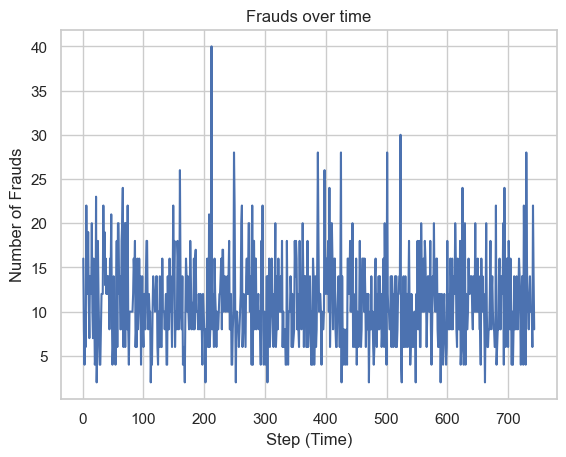

In [17]:
frauds_per_step = df[df["isFraud"] == 1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()

In [18]:
df.drop(columns=["step"], inplace=True)

In [19]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


Vamos descobrir quem são os usuários que mais fazem transações

In [20]:
top_senders = df["nameOrig"].value_counts().sort_values(ascending=False).head(10)
top_senders

nameOrig
C1065307291    3
C545315117     3
C1902386530    3
C2051359467    3
C2098525306    3
C724452879     3
C1677795071    3
C1784010646    3
C1976208114    3
C1530544995    3
Name: count, dtype: int64

Vamos descobrir quem são os top usuários que mais recebem transações

In [21]:
top_receivers = df["nameDest"].value_counts().sort_values(ascending=False).head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
C248609774     101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

Vamos descobrir os top usuários que mais enviam trasações, porém são fraudes!

In [22]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

Podemos perceber que a maioria das transações são feitas por saque/retirada do dinheiro em caixa eletrõnico

In [23]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Podemos notar que há poucas ocorrências de fraude para os dois tipos de transação, ele mal aparece no gráfico;

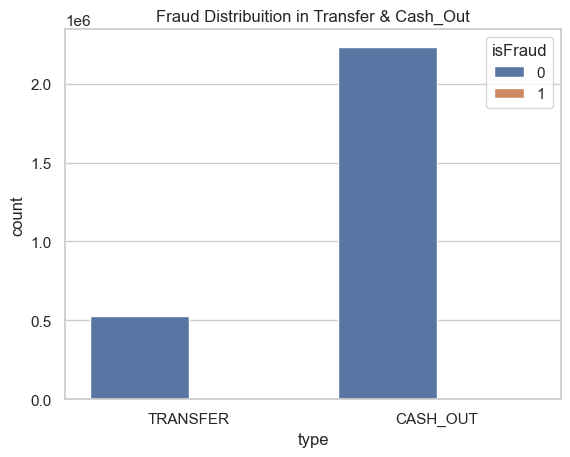

In [24]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribuition in Transfer & Cash_Out")
plt.show()

In [25]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [26]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


não há nenhuma correlação linear forte entre as variáveis numéricas e a ocorrência de fraude. Todos os valores na linha/coluna isFraud estão muito próximos de zero.


Isso não significa que as variáveis são inúteis para prever fraude. Significa apenas que a relação não é uma linha reta simples. Um padrão de fraude pode ser complexo (por exemplo: "a fraude acontece quando amount é alto E oldbalanceOrg é zero").

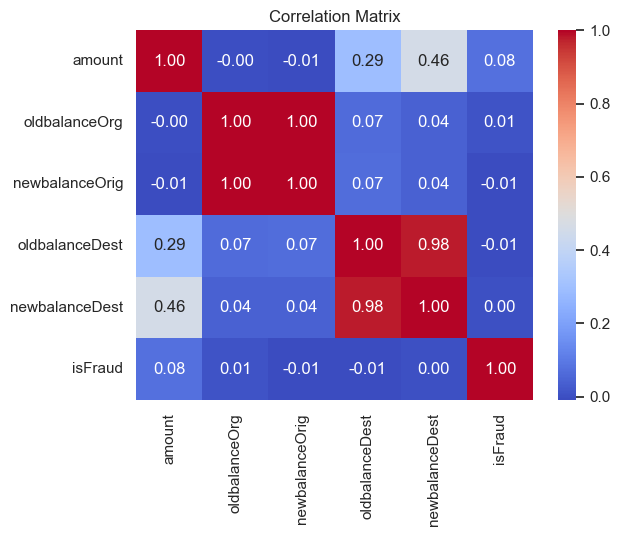

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

 Transações onde uma conta que tinha algum dinheiro foi completamente esvaziada (saldo final = 0) através de uma transferência ou saque. Este é um padrão que pode indicar atividade fraudulenta.

In [28]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) & (df["newbalanceOrig"] == 0) & (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]



Mais de 1 milhão de registros entraram neste padrão de suspeita de fraude

In [29]:
len(zero_after_transfer)

1188074

In [30]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


Aqui está o texto organizado em Markdown, com as analogias do "cão de guarda" incorporadas:

---

1.  `StandardScaler`
    * **O que faz?** Padroniza os dados numéricos.
    * **Como?** Ele transforma os dados para que tenham uma média de `0` e um desvio padrão de `1`. Isso é como "colocar todos os dados na mesma escala".
    * **Por que usar?** Muitos algoritmos de Machine Learning (como a `Regressão Logística`) funcionam melhor ou mais rápido quando as variáveis numéricas (`features`) estão na mesma escala. Por exemplo, se você tem uma coluna `"idade"` (valores de 18 a 80) e outra `"salário"` (valores de 1.000 a 100.000), o `StandardScaler` impede que a coluna `"salário"` domine o modelo só por ter números maiores.

2.  `LogisticRegression` (Regressão Logística): O Treinamento do Cão de Guarda
    * **O que faz?** A Regressão Logística é como você ensina o cão a decidir se uma pessoa na porta é `"Amigo"` (Classe 0) ou `"Ameaça"` (Classe 1).
    * **Como ele aprende?** Você não ensina regras duras como "se usar chapéu, é ameaça". Em vez disso, você mostra a ele várias pessoas (os dados) e diz quem é amigo e quem é ameaça.
    * **O que ele faz?** O cão aprende a calcular uma `"pontuação de desconfiança"` (a probabilidade) para cada pessoa, com base nas características (`features`) dela: "está chegando de noite?", "está forçando a porta?", "é o carteiro?".
    * **A decisão final:** O cão tem um `"nível de tolerância"` (o `threshold` de 0.5). Se a pontuação de desconfiança passa desse nível, ele late (classifica como `"Ameaça"`). Se não, ele abana o rabo (classifica como `"Amigo"`).
    * **Para lembrar:** Regressão Logística é o cão que aprende a dar uma pontuação de probabilidade e toma uma decisão com base nela.

3.  `confusion_matrix` e `classification_report`: O Boletim e as Notas do Cão
    * **O que fazem?** São ferramentas para avaliar a performance do "cão" (seu modelo) após o treinamento.

    * **`confusion_matrix` (Matriz de Confusão): O Boletim de Ocorrência do Cão**
        * Depois de um dia de trabalho, você quer saber como o cão se saiu. A Matriz de Confusão é o seu relatório de incidentes, com 4 cenários possíveis:
        * **Verdadeiro Positivo (TP):**
            * *O que aconteceu:* Um ladrão apareceu, e o cão latiu.
            * *Resumo:* Acertou! Pegou a ameaça real.
        * **Verdadeiro Negativo (TN):**
            * *O que aconteceu:* O carteiro chegou, e o cão ficou quieto.
            * *Resumo:* Acertou! Ignorou o amigo real.
        * **Falso Positivo (FP) - "O Exagerado":**
            * *O que aconteceu:* Sua avó chegou, e o cão latiu para ela.
            * *Resumo:* Erro! Deu um alarme falso e assustou uma pessoa amiga.
        * **Falso Negativo (FN) - "O Distraído":**
            * *O que aconteceu:* Um ladrão apareceu, e o cão estava dormindo.
            * *Resumo:* Erro Grave! Deixou a ameaça passar sem fazer nada.
        * *Para lembrar:* Matriz de Confusão é a tabela que mostra os 4 tipos de acertos e erros do seu modelo.

    * **`classification_report` (Relatório de Classificação): As Notas Finais do Cão**
        * Com o boletim de ocorrência em mãos, você dá duas notas principais para o desempenho do cão:
        * **`Precision` (Precisão) - A Nota de "Certeza":**
            * *Pergunta:* "Das vezes que o cão latiu, quantas vezes ele estava certo (era mesmo uma ameaça)?"
            * *Analogia:* Mede a *qualidade* dos alarmes. Se a Precisão é alta, significa que quando ele late, você pode confiar que é algo sério. Ele não late à toa para qualquer um.
        * **`Recall` (Revocação) - A Nota de "Vigilância":**
            * *Pergunta:* "De todas as ameaças reais que apareceram, quantas o cão conseguiu pegar?"
            * *Analogia:* Mede a *capacidade de detecção*. Se o Recall é alto, significa que o cão é um ótimo vigia e quase nenhuma ameaça passa despercebida por ele.
        * **`F1-Score` - A Média Geral:**
            * *Analogia:* É a nota final que combina "Certeza" e "Vigilância". Não adianta o cão ser super vigilante (Recall alto) se ele late para todo mundo (Precisão baixa). O F1-Score te diz se ele é *equilibrado e bom nas duas tarefas*.
        * *Para lembrar:* Relatório de Classficação são as notas (Precisão e Recall) que dizem o quão bom o seu modelo é em diferentes aspectos.

4.  `Pipeline`
    * **O que faz?** Permite "empacotar" uma sequência de passos de pré-processamento e modelagem em um único objeto.
    * **Como?** Você pode criar um "fluxo de trabalho" onde os dados primeiro passam pelo `StandardScaler` (passo 1) e depois são enviados para o `LogisticRegression` (passo 2), tudo de forma automática.
    * **Por que usar?** Deixa o código muito mais limpo, organizado e, o mais importante, evita um erro comum chamado `data leakage` (vazamento de dados), garantindo que o pré-processamento seja feito da forma correta durante o treino e o teste.

5.  `ColumnTransformer`
    * **O que faz?** Aplica diferentes transformações a diferentes colunas do seu conjunto de dados.
    * **Como?** É usado em conjunto com o `Pipeline`. Você pode dizer a ele: "aplique o `StandardScaler` nas colunas numéricas E aplique o `OneHotEncoder` nas colunas de texto (categóricas)".
    * **Por que usar?** É essencial para datasets do mundo real, que quase sempre têm colunas de tipos diferentes (números, texto, etc.).

6.  `OneHotEncoder`
    * **O que faz?** Transforma variáveis categóricas (texto) em um formato numérico que o modelo entenda.
    * **Como?** Se você tem uma coluna `"tipo_transacao"` com as categorias `["TRANSFER", "CASH_OUT", "PAYMENT"]`, ele cria três novas colunas binárias (com `0` ou `1`): `tipo_transacao_TRANSFER`, `tipo_transacao_CASH_OUT`, etc. Para uma transação que era `"TRANSFER"`, a nova coluna `tipo_transacao_TRANSFER` terá o valor `1` e as outras terão `0`.
    * **Por que usar?** Modelos de Machine Learning não conseguem processar texto diretamente. Essa é a forma padrão de converter categorias em números sem criar uma ordem falsa entre elas.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Vamos remover colunas desnecessárias para a geração do modelo

In [32]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [33]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


Vamos definir quem são colunas númericas e categóricas:

In [34]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]


Vamos declarar a feature "isFraude" como alvo do nosso modelo:

In [35]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

-----

### O que é `stratify=y` no `train_test_split`?

O `stratify=y` garante que a divisão entre os dados de treino e de teste mantenha a **mesma proporção** de cada classe (`y`) que existia no conjunto de dados original.

-----

### Analogia: O Saco de Balas Coloridas

Imagine que seu dataset (`y`) é um saco com 100 balas:

  * **90 balas verdes** (Classe "Não Fraude")
  * **10 balas vermelhas** (Classe "Fraude")

**Proporção original:** 90% verdes / 10% vermelhas. (Um dataset desbalanceado).
**Objetivo:** Dividir em 70% para treino e 30% para teste.

#### Cenário 1: Sem `stratify`

```python
train_test_split(X, y, test_size=0.3)
```

  * **O que acontece:** A divisão é aleatória. Você fecha os olhos e pega 30 balas.
  * **O Risco:** Por puro azar, você pode pegar 30 balas verdes e **nenhuma vermelha**.
  * **O Problema:** Se seu "saco de teste" não tem balas vermelhas, é impossível avaliar se o modelo aprendeu a identificá-las. O teste se torna inútil para a classe minoritária.

#### Cenário 2: Com `stratify=y`

```python
train_test_split(X, y, test_size=0.3, stratify=y)
```

  * **O que acontece:** A divisão é "inteligente". Ela olha a cor (`y`) de cada bala.
  * **O Resultado:** A proporção de 90%/10% é mantida em ambos os sacos:
      * **Saco de Treino (70 balas):** Terá \~63 verdes (90%) e \~7 vermelhas (10%).
      * **Saco de Teste (30 balas):** Terá \~27 verdes (90%) e \~3 vermelhas (10%).
  * **A Vantagem:** Você garante que o modelo será treinado e, principalmente, **testado de forma justa**, pois o conjunto de teste é uma representação fiel do problema original.

### Resumo

`stratify=y` é como cortar um bolo com várias camadas. Você garante que cada fatia (treino e teste) pegue um pedaço de **todas as camadas**, na mesma proporção do bolo inteiro.

**É essencial para datasets desbalanceados.**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Vamos definir para qual coluna cada modelo irá fazer as transformações:

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

### O que é `class_weight="balanced"`?

É um parâmetro que ajusta o "peso" ou a "penalidade" dos erros durante o treinamento do modelo, sendo crucial para datasets desbalanceados.

---

### Analogia: O Aluno e a Prova

Imagine que seu dataset é o material de estudo para uma prova de 100 questões:
* **99% do material:** História (Classe "Não Fraude")
* **1% do material:** Física Quântica (Classe "Fraude")

#### Cenário 1: Sem `class_weight` (O Aluno Preguiçoso)

* **A Estratégia do Aluno:** O aluno (o modelo) quer a maior nota (acurácia). Ele percebe que se responder "História" para **todas** as 100 questões, ele já garante **99% de acurácia**.
* **O Problema:** Para o aluno preguiçoso, essa é a melhor estratégia. Ele não precisa nem abrir o livro de Física Quântica.
* **No Modelo:** Sem o `class_weight`, o modelo pode perceber que obtém uma acurácia altíssima simplesmente prevendo "Não Fraude" para todo mundo. O pequeno erro ao ignorar as fraudes é compensado pelo acerto massivo na classe majoritária.
* **Risco:** O modelo se torna "preguiçoso" e ignora a classe minoritária (Fraude), pois essa é a maneira mais fácil de obter uma alta taxa de acerto.

#### Cenário 2: Com `class_weight="balanced"` (O Aluno com um Tutor Inteligente)

* **A Nova Regra:** Um tutor (o `class_weight="balanced"`) muda a regra da prova:
    * Errar História: Custa **1 ponto**.
    * Errar Física Quântica: Custa **99 pontos!**
* **O que o `class_weight` faz:** Ele aumenta o "peso" ou a "penalidade" de errar a classe minoritária (Fraude). Ele diz ao algoritmo: "Ei, eu sei que os exemplos de fraude são raros, mas um erro aqui custa muito caro!".
* **A Nova Estratégia:** O aluno não pode mais ignorar a Física Quântica. O custo de errar essa questão é tão alto que ele é **forçado a prestar atenção** naquele 1% do material.
* **No Modelo:** Com `class_weight="balanced"`, o `LogisticRegression` é penalizado muito mais severamente por classificar uma fraude real como "Não Fraude" (um Falso Negativo). Isso o força a aprender os padrões que definem uma fraude, mesmo que eles sejam raros.

### Resumo para Lembrar:

* **Sem `class_weight`:** O modelo foca na classe majoritária ("Não Fraude") para conseguir uma acurácia alta facilmente e pode acabar ignorando a classe minoritária ("Fraude").
* **Com `class_weight="balanced"`:** O modelo é **forçado a dar importância à classe minoritária**, porque errar nela se torna muito mais "caro" durante o treinamento. É a ferramenta que você usa para dizer ao seu modelo: "Não seja preguiçoso, a classe rara é a mais importante para mim!".

### Por que max_iter=1000 no código?

O valor padrão do max_iter no LogisticRegression é 100. Para datasets mais complexos, 100 "giros" podem não ser suficientes para o algoritmo encontrar o foco ideal. Aumentar para 1000 é uma forma de dar mais tempo e mais tentativas para o modelo trabalhar e encontrar uma solução melhor, evitando o ConvergenceWarning.

Resumo para lembrar: max_iter é o número máximo de "chances" que você dá ao modelo para ele aprender e se ajustar aos dados.

In [38]:
Pipeline = Pipeline(
    [
        ("prep", preprocessor),
        ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ]
)

In [39]:
Pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [40]:
y_pred = Pipeline.predict(X_test)

## As Classes (as linhas `0` e `1`)

* **`0` (Classe 0):** Representa a classe majoritária, ou seja, "Não-Fraude".
* **`1` (Classe 1):** Representa a classe minoritária, o evento que você quer detectar: "Fraude".
* **`support` (Suporte):**
    * **O que é:** Simplesmente a contagem de quantos exemplos *reais* de cada classe existem no seu conjunto de teste (`y_test`).
    * **Seus números:**
        * `Support 0 = 1.906.322`: Você tem ~1.9 milhão de transações legítimas nos dados de teste.
        * `Support 1 = 2.464`: Você tem 2.464 transações fraudulentas reais nos dados de teste.

## As Métricas Principais (as colunas)

Estas são as métricas mais importantes para avaliar a performance *por classe*.

### 1. `precision` (Precisão)

* **Pergunta que responde:** "Das vezes que o modelo *previu* uma classe, quantas vezes ele acertou?"
* **Foco:** Medir a qualidade das previsões positivas. É uma métrica de **confiabilidade**.
* **Seus números:**
    * `Precision 0 = 1.00` (100%): Das vezes que seu modelo disse "Não-Fraude", ele acertou 100% das vezes. (Cálculo: Verdadeiros Negativos / (VN + Falsos Negativos) = 1805476 / (1805476 + 175) ≈ 1.00).
    * `Precision 1 = 0.02` (2%): Das vezes que seu modelo disse **"É FRAUDE!"**, ele só acertou 2% das vezes. (Cálculo: Verdadeiros Positivos / (VP + Falsos Positivos) = 2289 / (2289 + 100846) ≈ 0.02).
* **Interpretação:** Este é o seu maior problema. O modelo gera uma quantidade massiva de alarmes falsos. Para cada 100 transações que ele sinaliza como fraude, 98 são, na verdade, legítimas.

### 2. `recall` (Revocação / Sensibilidade)

* **Pergunta que responde:** "De todas as instâncias *reais* de uma classe, quantas o modelo conseguiu *encontrar*?"
* **Foco:** Medir a capacidade do modelo de "achar" o que é importante. É uma métrica de **completude**.
* **Seus números:**
    * `Recall 0 = 0.95` (95%): De todas as transações *reais* de "Não-Fraude", o modelo identificou corretamente 95%. (Os outros 5% ele classificou erroneamente como fraude, gerando os Falsos Positivos).
    * `Recall 1 = 0.93` (93%): De todas as transações *reais* de "Fraude", o modelo conseguiu encontrar 93%. (Os outros 7% ele deixou passar como "Não-Fraude", são os Falsos Negativos).
* **Interpretação:** Esta é a sua melhor métrica. O modelo é muito bom em "farejar" a fraude. Ele só deixou 7% das fraudes passarem batido (175, segundo a matriz de confusão).

### 3. `f1-score`

* **Pergunta que responde:** "Qual é a média harmônica entre `precision` e `recall`?"
* **Foco:** É uma métrica de **equilíbrio**. Ela só será alta se *ambas*, precision e recall, forem altas. É excelente para datasets desbalanceados.
* **Seus números:**
    * `f1-score 0 = 0.97`: Como `precision` (1.00) e `recall` (0.95) da Classe 0 são ambos altos, o `f1-score` é alto.
    * `f1-score 1 = 0.04`: Como `precision` (0.02) é terrível e `recall` (0.93) é ótimo, a média é puxada para muito baixo. Isso mostra o desequilíbrio total do modelo: ele encontra tudo (recall), mas a um custo altíssimo de falsos positivos (precision).

## As Médias (as linhas de resumo)

### `accuracy` (Acurácia)

* **O que é:** A porcentagem de previsões corretas do total. (Acertos / Total de Previsões).
* **Seu número:** `0.95` (95%).
* **Interpretação:** É uma métrica 100% enganosa e inútil para o seu caso. Seu dataset tem 99.8% de "Não-Fraude" (1906322 / 1908786). Se você criasse um modelo "bobo" que *sempre* previsse "Não-Fraude", ele teria 99.8% de acurácia. O seu modelo, com 95%, é *pior* do que esse modelo bobo. **Sempre ignore a acurácia em datasets desbalanceados.**

### `macro avg` (Média Macro)

* **O que é:** A média aritmética simples das métricas de todas as classes. Ela trata a Classe 0 e a Classe 1 com **exatamente o mesmo peso**.
* **Seus números:**
    * `Macro Precision = (1.00 + 0.02) / 2 = 0.51`
    * `Macro Recall = (0.95 + 0.93) / 2 = 0.94`
* **Interpretação:** É uma boa métrica para ver o desempenho médio "por classe", sem se importar com o desbalanceamento. Um F1-Score macro de 0.51 diz que, na média, o equilíbrio do seu modelo é medíocre.

### `weighted avg` (Média Ponderada)

* **O que é:** A média das métricas, mas ponderada pelo `support` de cada classe. A classe com mais amostras (Classe 0) terá um peso muito maior na média.
* **Seus números:** `Precision = 1.00`, `Recall = 0.95`, `f1-score = 0.97`.
* **Interpretação:** Note como esses números são quase *idênticos* aos da Classe 0. Isso acontece porque a Classe 0 representa 99.8% dos dados. Assim como a Acurácia, a `weighted avg` é **enganosa** aqui, pois ela *esconde* o desempenho péssimo na classe que você realmente quer medir (Fraude).

## Conclusão da Análise

* **O que o modelo faz bem?** Encontrar fraudes. Ele tem um `recall` de 93% para fraudes, o que é ótimo.
* **O que o modelo faz mal?** Confirmar fraudes. Ele tem uma `precision` de 2% para fraudes, o que é terrível.
* **Diagnóstico:** O modelo está "sensível" demais. Ele "grita fraude" por qualquer motivo, gerando 100 mil falsos positivos para conseguir pegar 2.289 fraudes reais.
```



In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.93      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



# Entendendo a Matriz de Confusão (Confusion Matrix)

A matriz de confusão é a fonte de todas as outras métricas. Vamos traduzir esses números:

`array([[1805476, 100846], [ 175, 2289]])`

Vamos assumir que:

* **Classe 0:** Não-Fraude (o caso "normal" ou "negativo")
* **Classe 1:** Fraude (o caso "raro" ou "positivo" que queremos detectar)

Aqui está o que cada número significa:

* **1.805.476 (Verdadeiros Negativos - TN):**
    * **O que é:** Transações que *não eram* fraude e seu modelo *corretamente* disse que *não eram* fraude.
    * **Resultado:** Ótimo!

* **100.846 (Falsos Positivos - FP):**
    * **O que é:** Transações que *não eram* fraude, mas seu modelo *incorretamente* marcou como *fraude*.
    * **Resultado:** **Este é o seu maior problema.** São 100 mil alarmes falsos!

* **175 (Falsos Negativos - FN):**
    * **O que é:** Transações que *eram* fraude, mas seu modelo *incorretamente* disse que *não eram* fraude.
    * **Resultado:** Este é o erro mais perigoso. Deixou 175 fraudes passarem.

* **2.289 (Verdadeiros Positivos - TP):**
    * **O que é:** Transações que *eram* fraude e seu modelo *corretamente* marcou como *fraude*.
    * **Resultado:** Excelente! Pegou 2.289 fraudes.

In [42]:
confusion_matrix(y_test, y_pred)

array([[1805476,  100846],
       [    175,    2289]])